<a href="https://colab.research.google.com/github/LeeHakHyun/Compiler/blob/master/Basic_Model/tensorflow2_0_FashingMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1] load library

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-beta1


# [2] load dataset and define class names

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# [3] see dataset

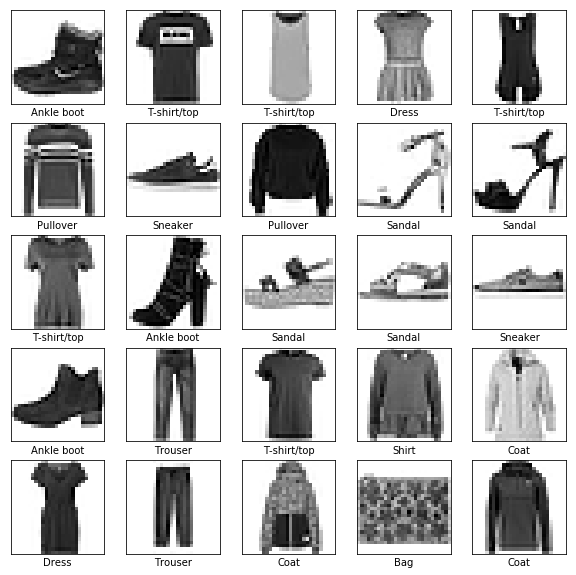

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# [4] model define

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# [5] model compile

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# [6] model train

In [11]:
model.fit(train_images, train_labels, epochs=5)


W0824 15:06:58.209105 139877747775360 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4999 - accuracy: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3786 - accuracy: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3398 - accuracy: 0.8760
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3154 - accuracy: 0.8857
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2974 - accuracy: 0.8916


# [7] model evaluate

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test accuary:', test_acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.3515 - accuracy: 0.8705
test accuary: 0.8705


# [8] model predict and check

In [24]:
predictions = model.predict(test_images)

print(f'{predictions[0]}')
print('\n' + f'{np.argmax(predictions[0])}')



[4.5712391e-04 1.5416762e-06 6.3981468e-05 1.3046022e-04 5.7899757e-05
 1.0811672e+00 2.3689587e-03 3.4115407e+00 1.9342208e-04 9.5504021e+01]

9


# [9] define plot

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# [10] show plot

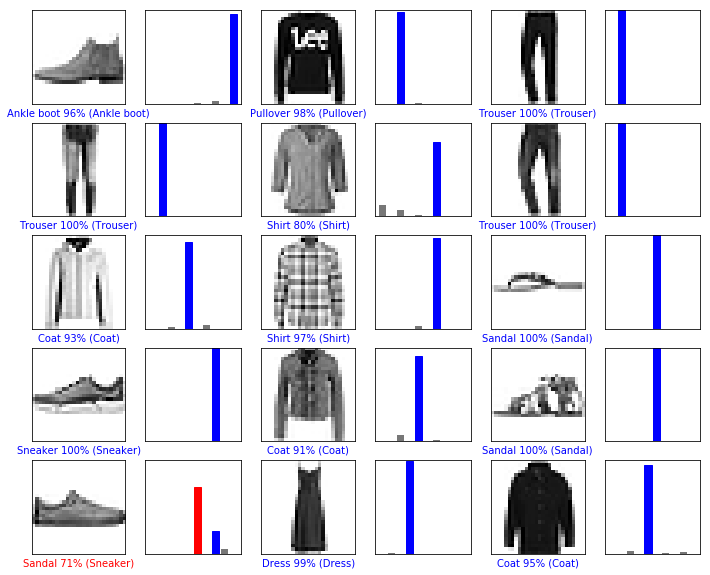

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()